In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/cleaned.csv')


In [2]:
X = df[[
    'card_method',
    'merchant_state',
    'errors',
    'card_type',
    'user_age',
    'user_gender',
    'user_rating',
    'user_number_of_cards'
]]

X = pd.get_dummies(X)

y = df['flagged_as_fraud']

In [3]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression().fit(xtrain,ytrain)


In [5]:
test_prediction = model.predict(xtest)

print('Accuracy Score: ', accuracy_score(ytest, test_prediction))

Accuracy Score:  0.8625200481154771


In [6]:
print('Confusion Matrix:')
print(confusion_matrix(ytest, test_prediction))

Confusion Matrix:
[[12367  1602]
 [ 1141  4842]]


<Axes: ylabel='feature'>

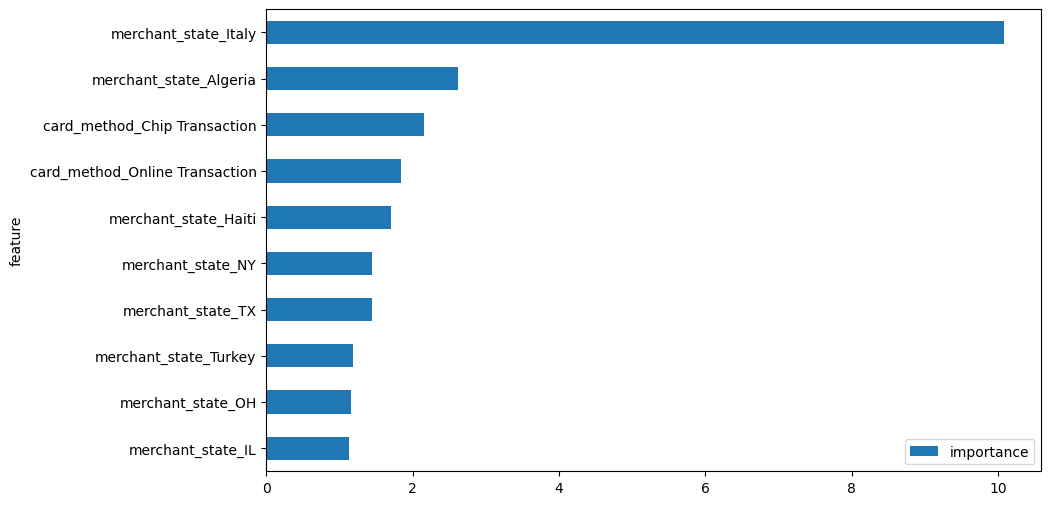

In [12]:
# Assessing importance
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('importance', ascending=True).tail(10)
feature_importance.plot(x='feature', y='importance', kind='barh', figsize=(10, 6))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(
    n_estimators=100, 
    max_features='auto', 
    min_samples_leaf=10
).fit(xtrain, ytrain)

ypred = rf_classifier.predict(xtest)

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(ytest, ypred))

Accuracy: 0.8763031275060145

Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.89      0.91     13976
         Yes       0.77      0.84      0.80      5976

    accuracy                           0.88     19952
   macro avg       0.85      0.87      0.86     19952
weighted avg       0.88      0.88      0.88     19952

